<a href="https://colab.research.google.com/github/eziong/MachineLearning02/blob/master/Assignment07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

222222222222222222
3333333333333333333333
44444444444444444444444
#Plot the training data


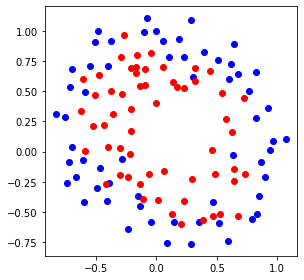

5555555555555555555555555
#Plot the training error


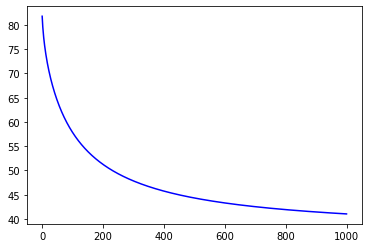

#Plot the training accuracy


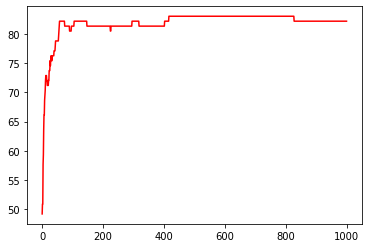

#Write down the final training accuracy
82.20338983050848  % accuracy
#Plot the optimal classifier superimposed on the training data


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: The following kwargs were not used by contour: 'linewidth'


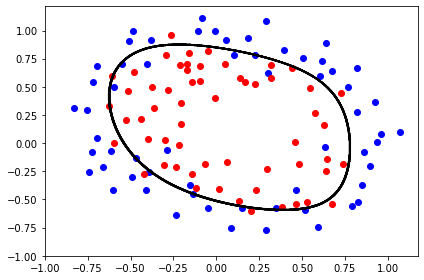

In [10]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('data-nonlinear.txt', delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]


### Definitions of z, sigma, objective function, weight, high dimensional function
def z(theta,X):
  return g(theta,X)

def g(theta, X):
  z = 0
  for i in range(len(X)):
    z = z + theta[i]*X[i]
  return z

def sigma(z):
  return 1/(1+np.exp(-z))

def J(l,z,R):
  sum = 0
  for i in range(len(l)):
    sum = sum + l[i]*(-np.log(sigma(z[i])))+(1-l[i])*(-np.log(1-sigma(z[i])))
  return sum + R

def J_prime(_z,_l,_xi):
    return (sigma(_z)-_l)*_xi


def GD_algoritm(theta,z,l,X,alpha,Lambda):
  for i in range(len(l)):
    for j in range(len(X)):
      theta[j] = (1-alpha*Lambda)*theta[j] - alpha*w(z[i],l[i],X[j][i])
  return theta

def make_X(X):
  ret = []
  for i in range(10):
    for j in range(10):
      ret.append((X[0]**i)*(X[1]**j))
  return ret

def make_theta(X):
  ret = []
  for i in range(len(X)):
    ret.append(0)
  return ret

def w(z,l,xi):
  return J_prime(z,l,xi)

def accuracy_cal(z,l):
  res = 0
  for i in range(len(z)):
    if (sigma(z[i]) >=1/2 and l[i]==1) or (sigma(z[i]) <1/2 and l[i]==0):
      res = res + 1
  return res

def Regularization(Lambda,theta):
  sum = 0
  for theta_i in theta:
    sum = sum + theta_i
  return sum*Lambda/2

### Basic Settings
R_X = [pointX,pointY]
X = make_X(R_X)
l=label
theta = make_theta(X)
err_J = []
alpha = 5*1e-3 #learning rate
accuracy = []
Lambda = 0

### Plot the training error
## iteration of gradient decent until convergence
for _ in range(1000):
  R = Regularization(Lambda,theta)
  zet = z(theta,X)
  J_val = J(l,zet,R)
  err_J.append(J_val)
  accuracy_val = accuracy_cal(zet,l) / len(l) * 100
  accuracy.append(accuracy_val)
  theta = GD_algoritm(theta,zet,l,X,alpha,Lambda)

print("222222222222222222")

def f(x,y):
  sum = 0
  rx = [x,y]
  tx = make_X(rx)
  for i in range(len(tx)):
    sum = sum + theta[i]*tx[i]
  return sigma(sum)

print("3333333333333333333333")

xx = np.linspace(-1,1,1000)
yy = np.linspace(-1,1,1000)
x_mesh,y_mesh = np.meshgrid(xx,yy)
zz = f(x_mesh,y_mesh)

print("44444444444444444444444")

#Plot the training data
print("#Plot the training data")
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

print("5555555555555555555555555")

#Plot the training error
print("#Plot the training error")
plt.plot(err_J,color='b')
plt.show()

#Plot the training accuracy
print("#Plot the training accuracy")
plt.plot(accuracy,color='r')
plt.show()

#Write down the final training accuracy
print("#Write down the final training accuracy")
print(accuracy[len(accuracy)-1] , " % accuracy")

#Plot the optimal classifier superimposed on the training data
print("#Plot the optimal classifier superimposed on the training data")
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.contour(x_mesh,y_mesh,np.round(zz,2)==0.5,colors='k',linewidth=.5)
plt.show()